In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics import tsaplots
from matplotlib import pyplot as plt

In [26]:
sales_train = pd.read_csv("../data/sales_train_validation_afcs2023.csv")
calendar = pd.read_csv("../data/calendar_afcs2023.csv")

In [27]:
date_range = pd.Series(pd.date_range(start="2011-01-29", end="2016-06-19", freq='D')).dt.strftime('%Y-%m-%d').to_list()
date_range.insert(0, "id")

In [28]:
sales_train.columns = date_range[:len(sales_train.columns)]

In [29]:
sales_train[['Food', "Loc1", "Loc2", "Type"]] = sales_train.id.str.rsplit("_", n=3, expand=True)

In [30]:
sales_train = sales_train.drop("id", axis=1)

In [31]:
sales_train = sales_train.melt(id_vars=['Food', "Loc1", "Loc2", "Type"], var_name="sales_time", value_name="sales_amount")

In [32]:
sales_train["sales_time"] = pd.to_datetime(sales_train["sales_time"])

In [33]:
sales_train.head()

,Food,Loc1,Loc2,Type,sales_time,sales_amount
0,FOODS_3_001,TX,3,validation,2011-01-29,0
1,FOODS_3_002,TX,3,validation,2011-01-29,0
2,FOODS_3_003,TX,3,validation,2011-01-29,0
3,FOODS_3_004,TX,3,validation,2011-01-29,0
4,FOODS_3_005,TX,3,validation,2011-01-29,0


In [34]:
len(sales_train.Food.unique())

823

In [35]:
sales_train.describe()

,sales_time,sales_amount
count,1574399,1.574399e+06
mean,2013-09-11 00:00:00,1.903873e+00
min,2011-01-29 00:00:00,0.000000e+00
25%,2012-05-21 00:00:00,0.000000e+00
50%,2013-09-11 00:00:00,0.000000e+00
75%,2015-01-02 00:00:00,1.000000e+00
max,2016-04-24 00:00:00,3.850000e+02
std,NaN,6.350476e+00


### Certain items sell a lot more than others

In [36]:
sales_train.groupby("Food")["sales_amount"].sum().sort_values(ascending=False)

Food
FOODS_3_586    150122
FOODS_3_090    114854
FOODS_3_252     86632
FOODS_3_555     77673
FOODS_3_377     73797
                ...  
FOODS_3_633        64
FOODS_3_472        47
FOODS_3_693        46
FOODS_3_260        43
FOODS_3_171        35
Name: sales_amount, Length: 823, dtype: int64

0          Saturday
1          Saturday
2          Saturday
3          Saturday
4          Saturday
             ...   
1574394      Sunday
1574395      Sunday
1574396      Sunday
1574397      Sunday
1574398      Sunday
Name: sales_time, Length: 1574399, dtype: object

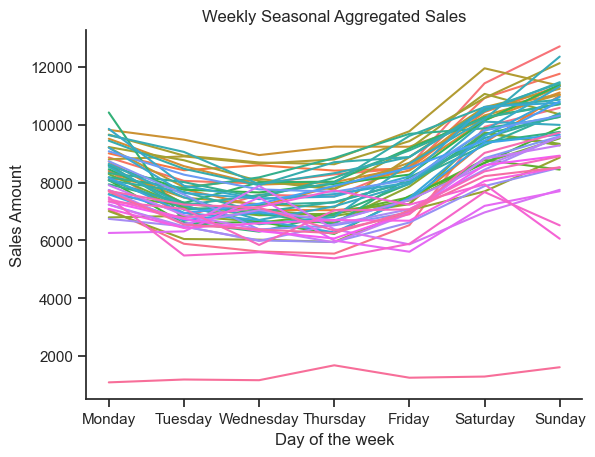

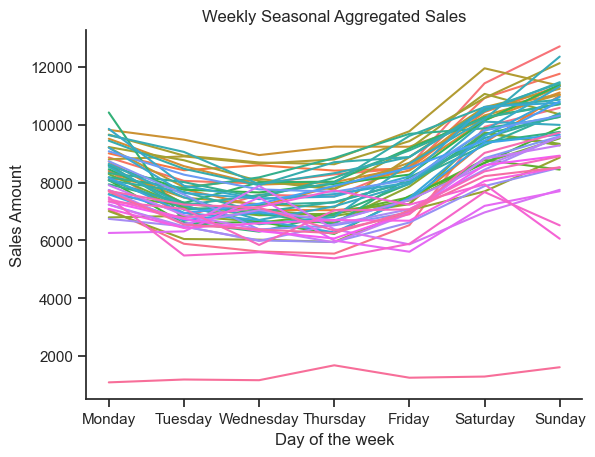

In [71]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Convert week column to string
sales_train['week_str'] = sales_train.sales_time.dt.isocalendar().week.astype(str)

g = sns.lineplot(
    x=sales_train.sales_time.dt.dayofweek,
    y=sales_train.sales_amount,
    hue=sales_train['week_str'],
    errorbar=None,
    estimator="sum"
).set_title("Weekly Seasonal Aggregated Sales")
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(range(7), days_of_week)
plt.xlabel("Day of the week")
plt.ylabel("Sales Amount")
plt.legend([], [], frameon=False)
plt.show()


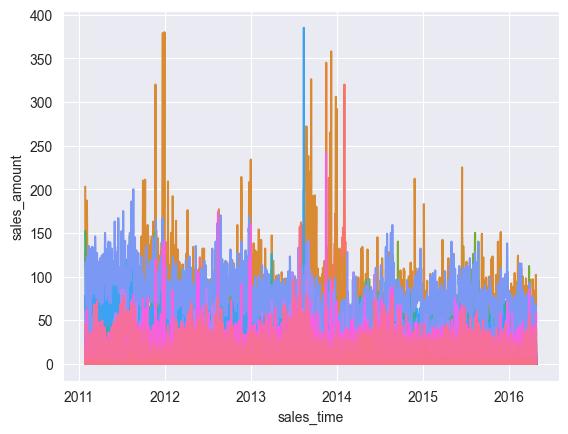

In [13]:
g = sns.lineplot(sales_train, x="sales_time", y="sales_amount", hue='Food')
plt.legend([],[], frameon=False)

In [77]:
sales_train

,Food,Loc1,Loc2,Type,sales_time,sales_amount,week_str
0,FOODS_3_001,TX,3,validation,2011-01-29,0,4
1,FOODS_3_002,TX,3,validation,2011-01-29,0,4
2,FOODS_3_003,TX,3,validation,2011-01-29,0,4
3,FOODS_3_004,TX,3,validation,2011-01-29,0,4
4,FOODS_3_005,TX,3,validation,2011-01-29,0,4
...,...,...,...,...,...,...,...
1574394,FOODS_3_823,TX,3,validation,2016-04-24,2,16
1574395,FOODS_3_824,TX,3,validation,2016-04-24,0,16
1574396,FOODS_3_825,TX,3,validation,2016-04-24,0,16
1574397,FOODS_3_826,TX,3,validation,2016-04-24,2,16


In [90]:
most_sold_vs_lowest_sold = sales_train[sales_train["Food"].isin(["FOODS_3_171", "FOODS_3_586"])].copy()
most_sold_vs_lowest_sold["sales_amount"] = most_sold_vs_lowest_sold["sales_amount"].apply(lambda x: np.log(x + 1))

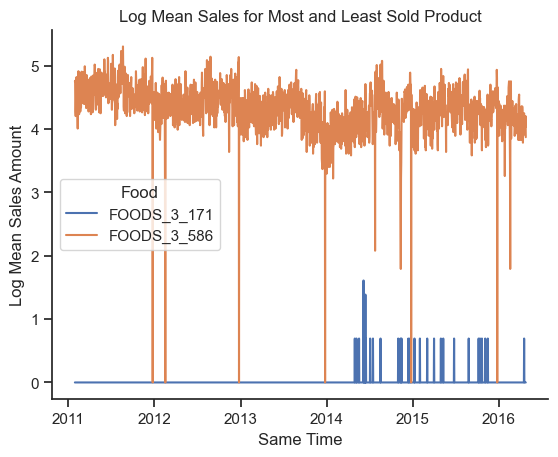

In [95]:
sns.lineplot(data=most_sold_vs_lowest_sold, x='sales_time', y='sales_amount', hue="Food", estimator="mean")
plt.title("Log Mean Sales for Most and Least Sold Product")
plt.xlabel("Same Time")
plt.ylabel("Log Mean Sales Amount")
plt.show()

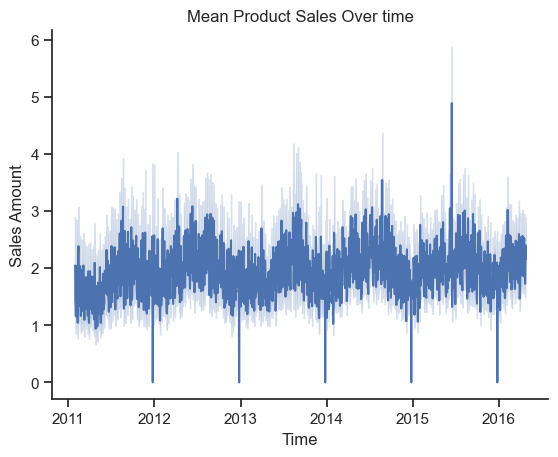

In [24]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
g = sns.lineplot(sales_train, x="sales_time", y="sales_amount").set_title("Mean Product Sales Over time")
plt.xlabel("Time")
plt.ylabel("Sales Amount")
plt.legend([],[], frameon=False)

In [15]:
sales_train = sales_train.set_index("sales_time")

In [16]:
mean_sales_per_product = sales_train.groupby("Food")['sales_amount'].resample("W").sum()

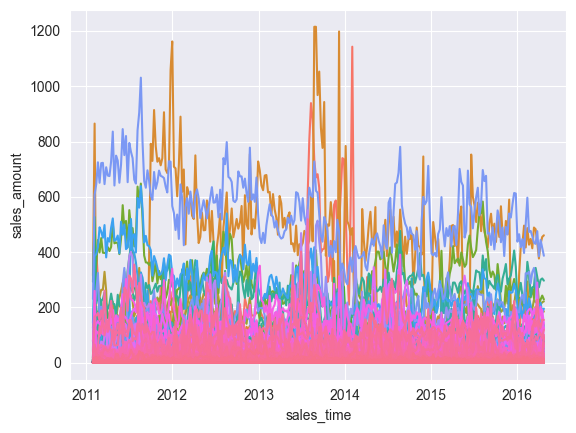

In [17]:
sns.lineplot(mean_sales_per_product.reset_index(), x="sales_time", y="sales_amount", hue='Food')
plt.legend([],[], frameon=False)

In [18]:
mean_sales = sales_train['sales_amount'].resample("W").sum()

### There is both seasonality in the data

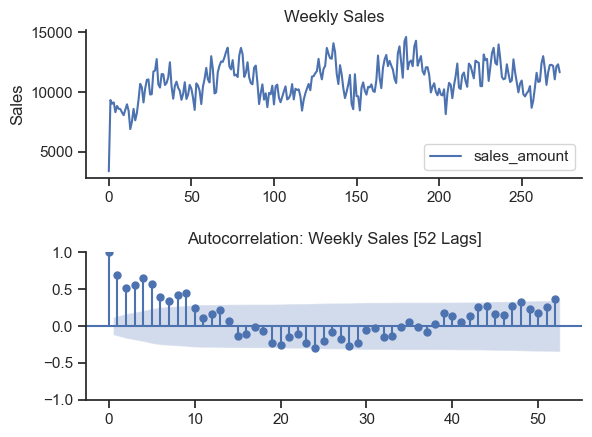

In [68]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

f, (ax1, ax2) = plt.subplots(2, 1)
sns.lineplot(mean_sales.reset_index(), ax=ax1)
tsaplots.plot_acf(mean_sales, lags=52, ax=ax2)
ax1.set_title("Weekly Sales")
ax1.set(ylabel= "Sales")
ax2.set_title("Autocorrelation: Weekly Sales [52 Lags]")
plt.subplots_adjust(hspace=0.5)
plt.show()